In [7]:
from build_data import Station, build_data
import geopy.distance
from itertools import combinations
import matplotlib.pyplot as plt
import random

In [2]:
import sys
import importlib
import find_shortest_path
import distance
import search_algorithm
sys.path.append('./find_shortest_path.py')
sys.path.append('./distance.py')
sys.path.append('./search_algorithm.py')

In [3]:
%load_ext autoreload
%autoreload 1
%aimport find_shortest_path
%aimport distance
%aimport search_algorithm
importlib.reload(find_shortest_path)
importlib.reload(distance)
importlib.reload(search_algorithm)

<module 'search_algorithm' from '/data/lab/STA303-Assignment03/search_algorithm.py'>

In [4]:
stations, underground_lines = build_data()

In [10]:
for i in stations['Acton Town'].links: #.links是list
    print(i.name)

South Ealing
Chiswick Park
Ealing Common
Turnham Green


In [31]:
selected_pairs = []

for distance_range in range(0, 60, 1): 
    min_distance = distance_range
    max_distance = distance_range + 1
    
    for station1, station2 in combinations(stations, 2):
        dist = distance.geographic_distance(stations[station1], stations[station2])

        if min_distance <= dist < max_distance:
            selected_pairs.append((station1, station2, dist))
            break

In [32]:
a_execution_time = []
a_total_cost = []
u_execution_time = []
u_total_cost = []
g_execution_time = []
g_total_cost = []
for pair in selected_pairs:
    path, execution_time, total_cost = find_shortest_path.get_path(pair[0], pair[1], "Astar", "geo", "euc", stations)
    a_execution_time.append(execution_time)
    a_total_cost.append(total_cost)
for pair in selected_pairs:
    path, execution_time, total_cost = find_shortest_path.get_path(pair[0], pair[1], "Ucs", "geo", "euc", stations)
    u_execution_time.append(execution_time)
    u_total_cost.append(total_cost)
for pair in selected_pairs:
    path, execution_time, total_cost = find_shortest_path.get_path(pair[0], pair[1], "GreedyBFS", "geo", "euc", stations)
    g_execution_time.append(execution_time)
    g_total_cost.append(total_cost)

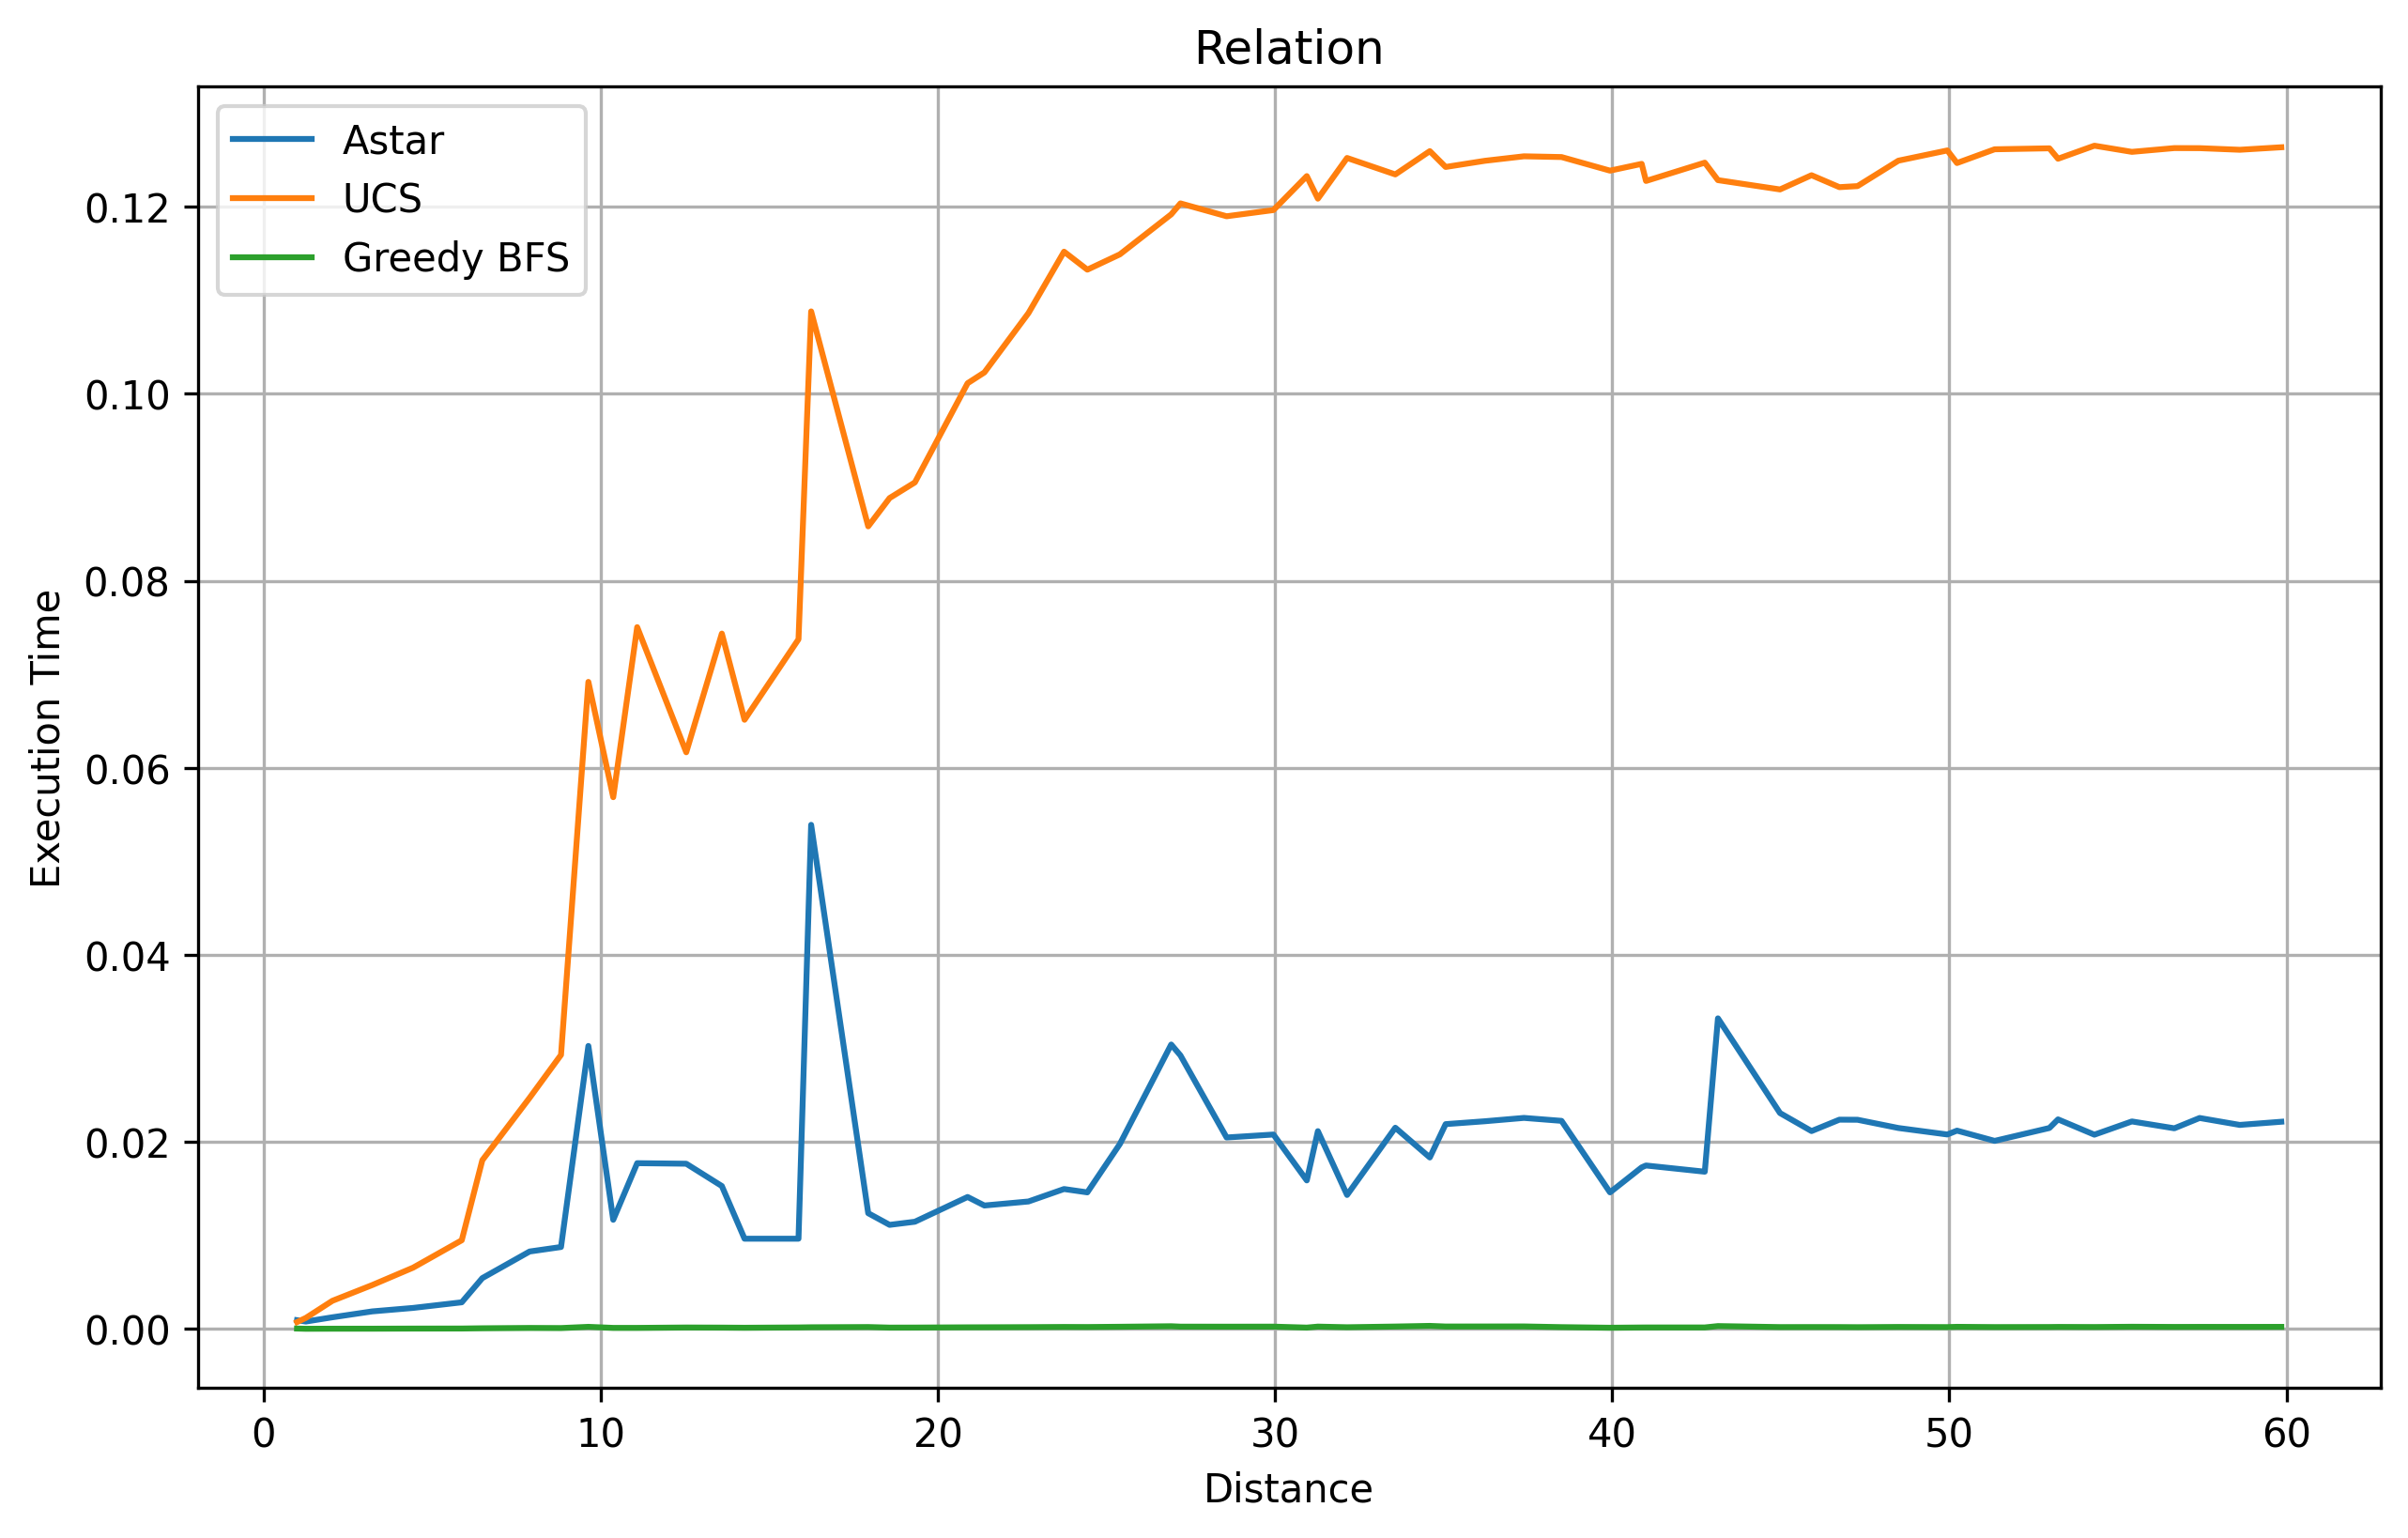

In [37]:
distances = [pair[2] for pair in selected_pairs]

plt.figure(figsize=(10, 6),dpi=300)

plt.plot(distances, a_execution_time, label='Astar')
plt.plot(distances, u_execution_time, label='UCS')
plt.plot(distances, g_execution_time, label='Greedy BFS')

plt.title('Relation')
plt.xlabel('Distance')
plt.ylabel('Execution Time')
plt.legend()
plt.grid(True)
plt.savefig('algorithm_time.png')
plt.show()

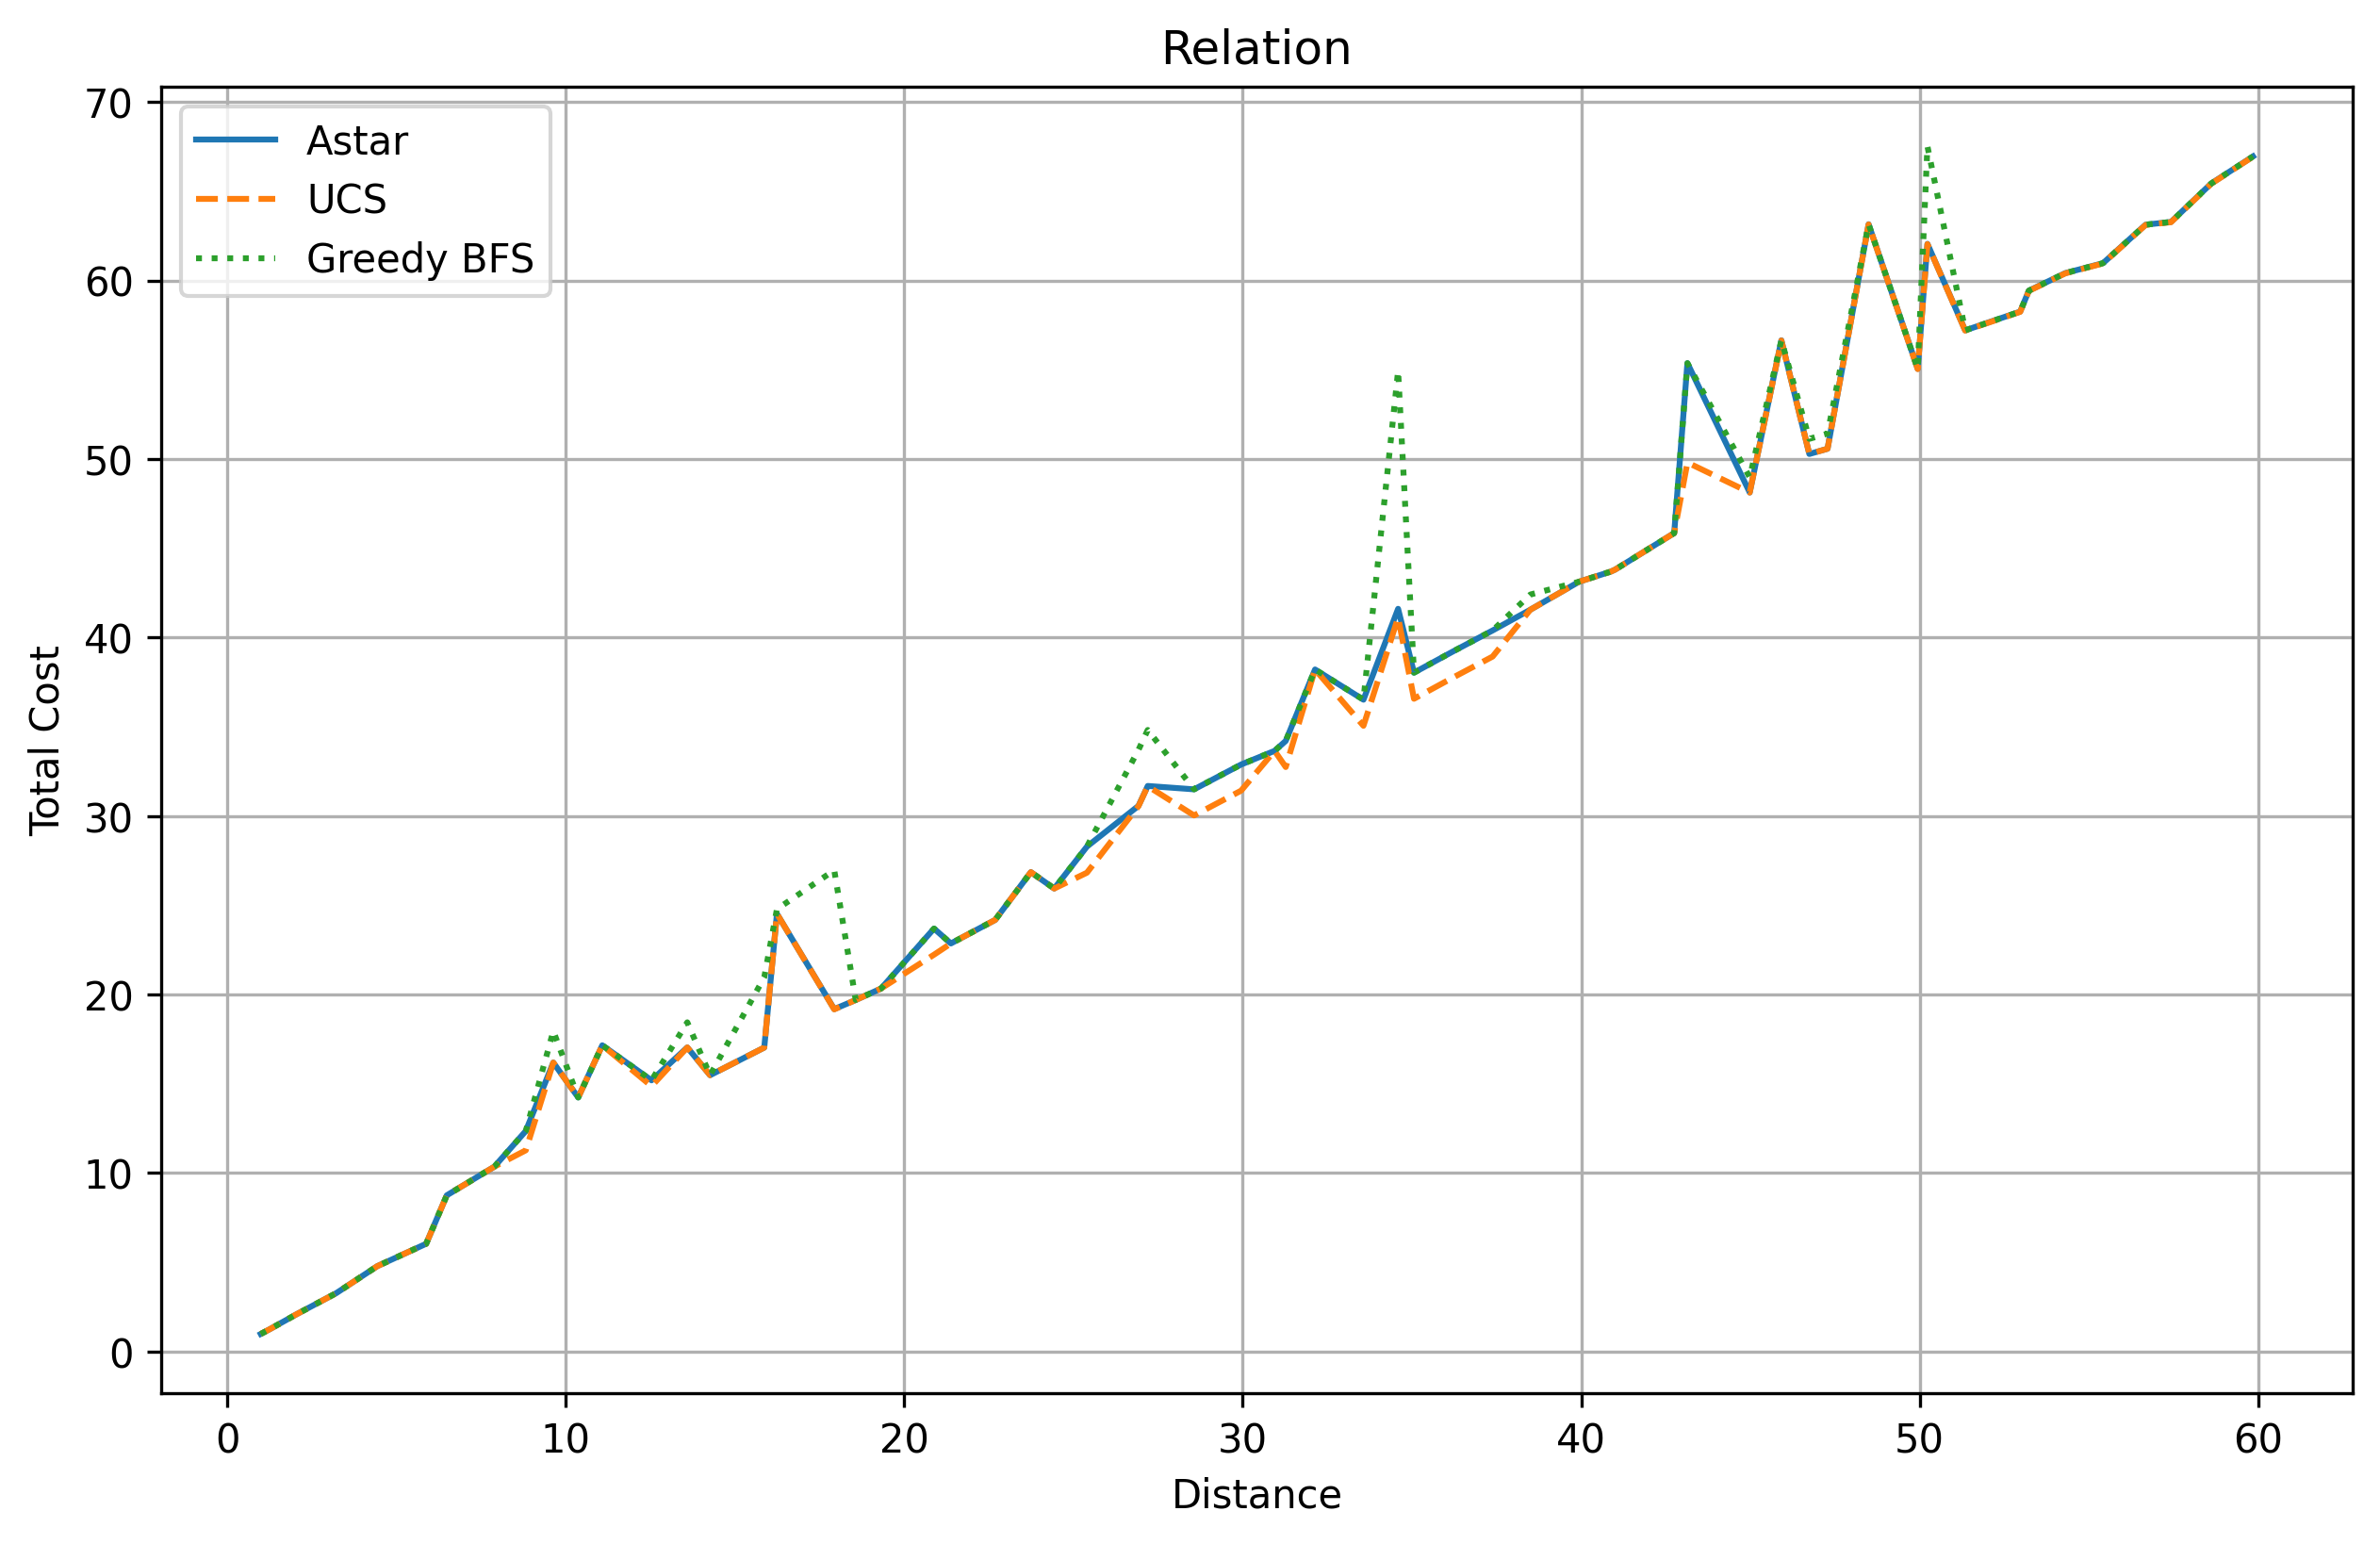

In [38]:
distances = [pair[2] for pair in selected_pairs]

plt.figure(figsize=(10, 6),dpi=300)

plt.plot(distances, a_total_cost, label='Astar')
plt.plot(distances, u_total_cost, label='UCS', linestyle='dashed')
plt.plot(distances, g_total_cost, label='Greedy BFS', linestyle='dotted')

plt.title('Relation')
plt.xlabel('Distance')
plt.ylabel('Total Cost')
plt.legend()
plt.grid(True)
plt.savefig('algorithm_cost.png')
plt.show()

In [42]:
euc_execution_time = []
euc_total_cost = []
geo_execution_time = []
geo_total_cost = []
manh_execution_time = []
manh_total_cost = []
for pair in selected_pairs:
    path, execution_time, total_cost = find_shortest_path.get_path(pair[0], pair[1], "Astar", "geo", "euc", stations)
    euc_execution_time.append(execution_time)
    euc_total_cost.append(total_cost)
for pair in selected_pairs:
    path, execution_time, total_cost = find_shortest_path.get_path(pair[0], pair[1], "Astar", "geo", "geo", stations)
    geo_execution_time.append(execution_time)
    geo_total_cost.append(total_cost)
for pair in selected_pairs:
    path, execution_time, total_cost = find_shortest_path.get_path(pair[0], pair[1], "Astar", "geo", "manh", stations)
    manh_execution_time.append(execution_time)
    manh_total_cost.append(total_cost)

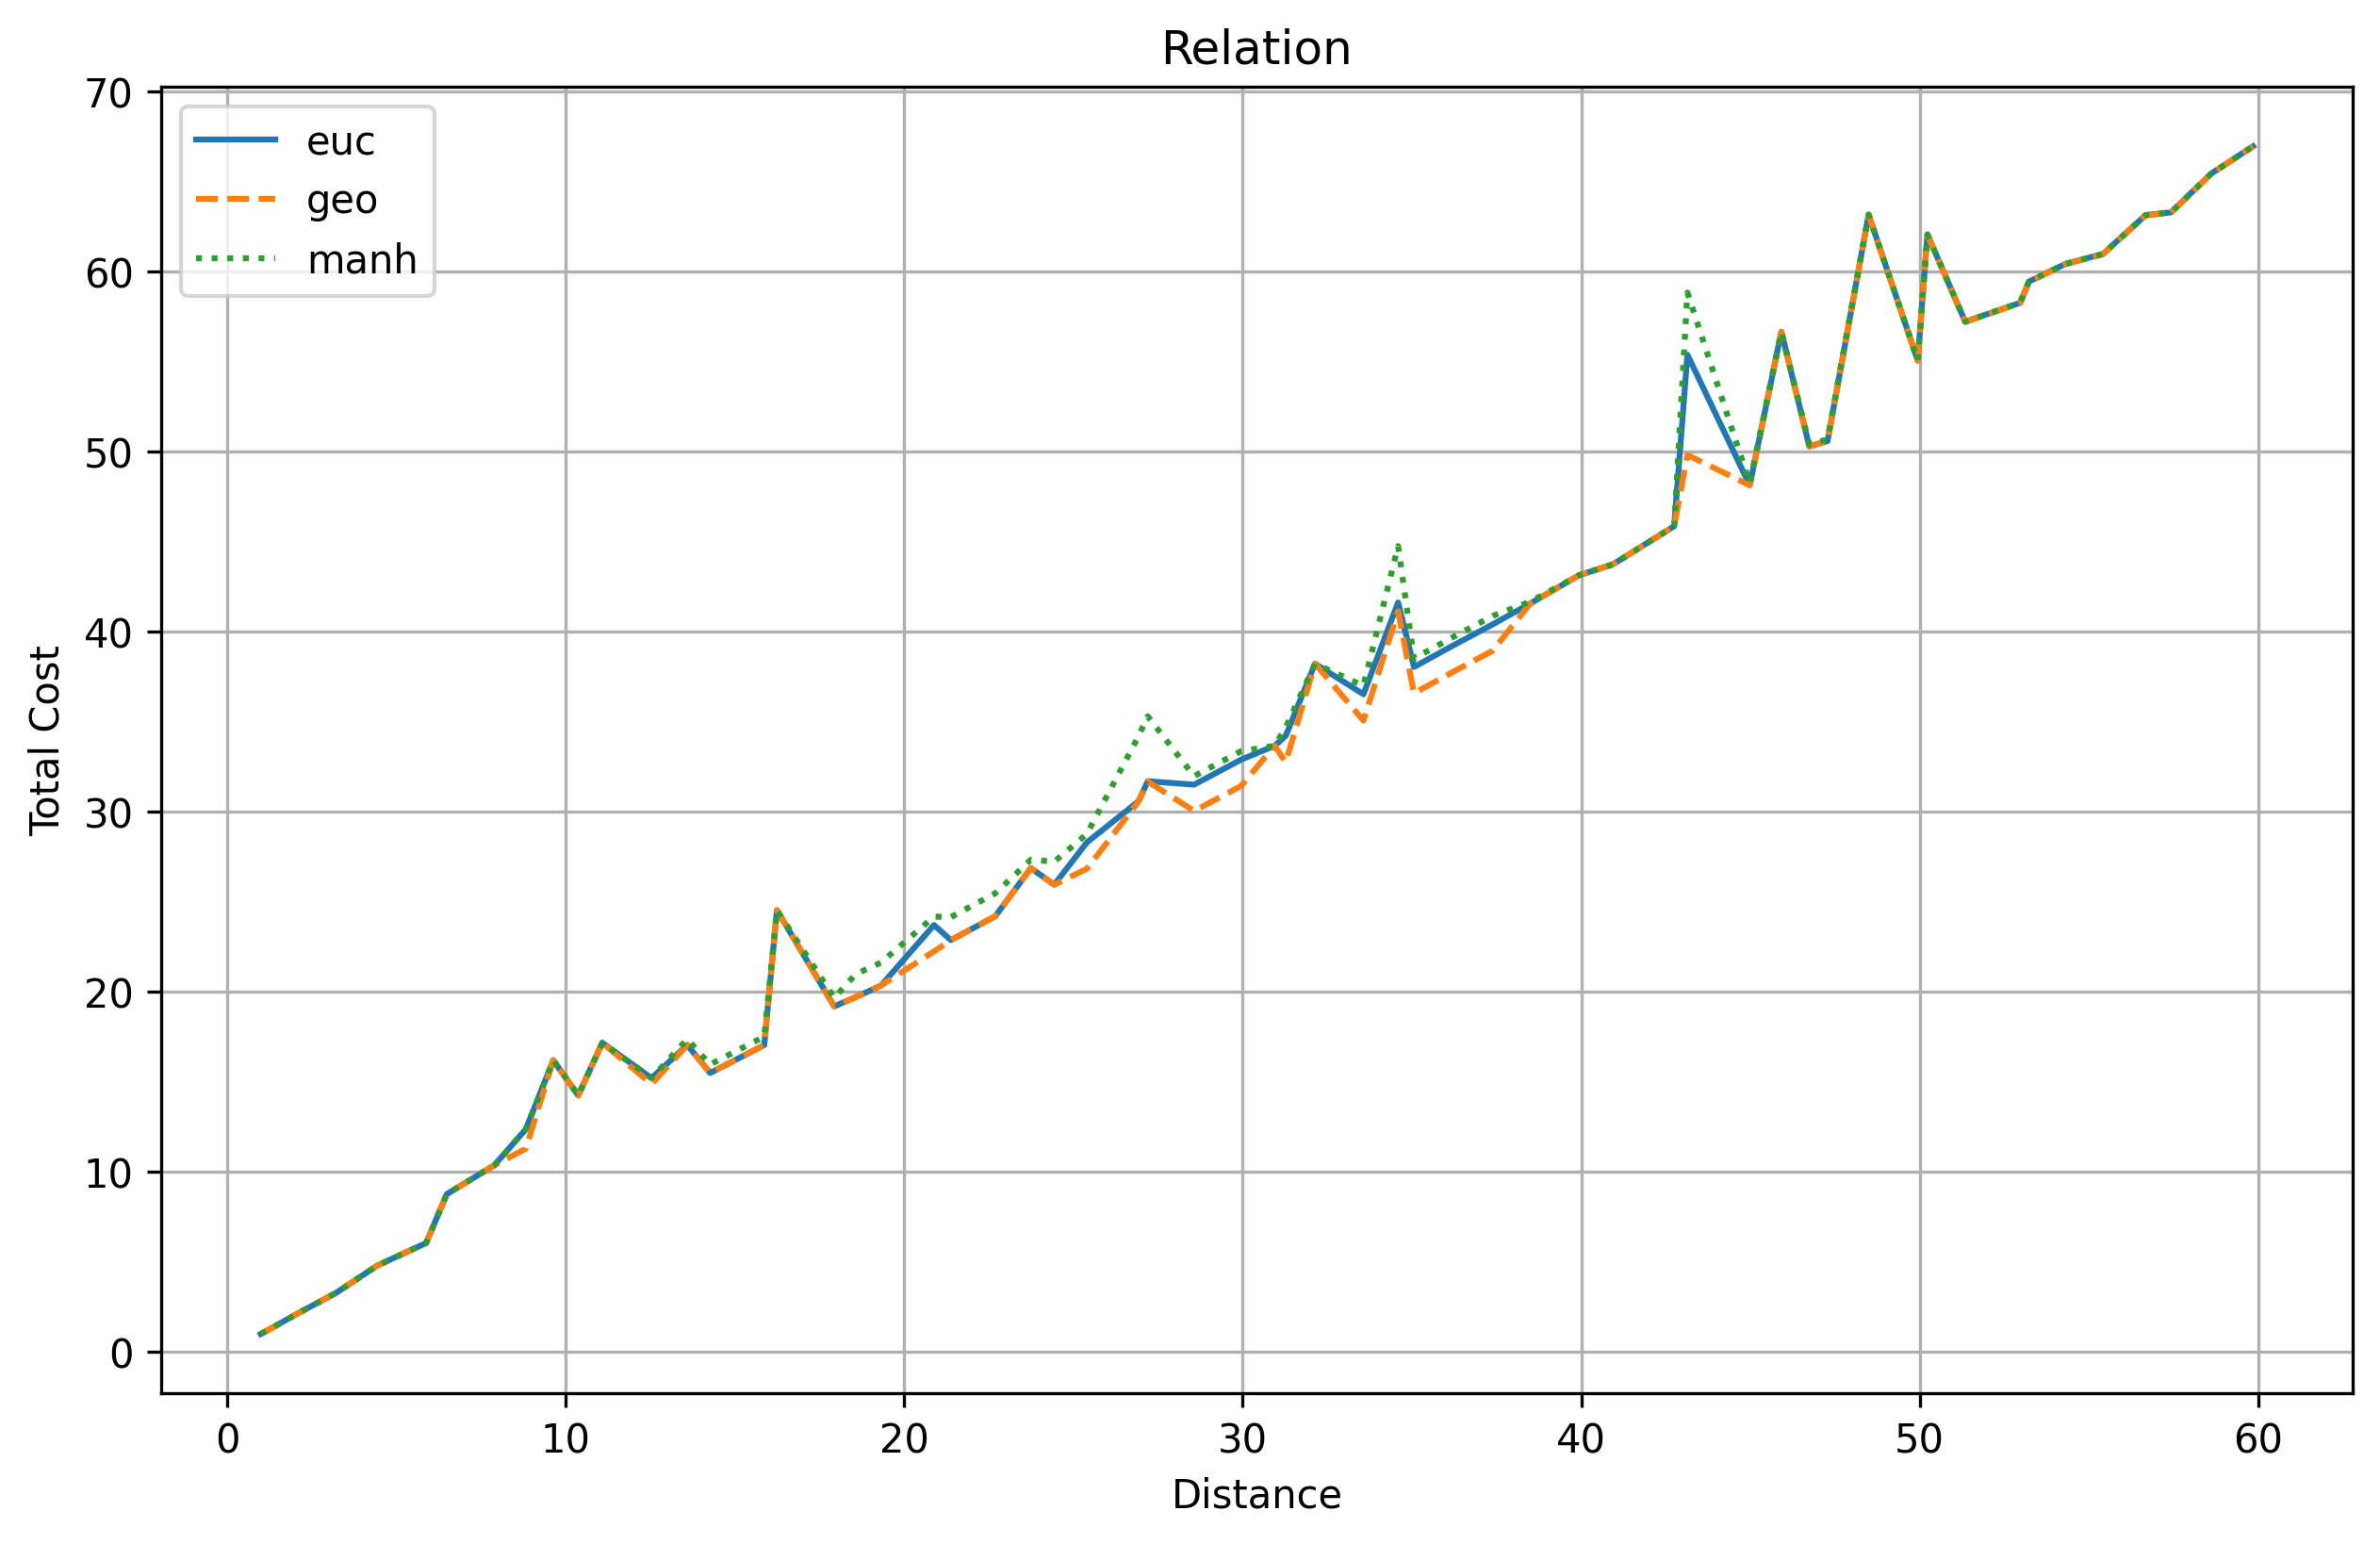

In [40]:
distances = [pair[2] for pair in selected_pairs]

plt.figure(figsize=(10, 6),dpi=300)

plt.plot(distances, euc_total_cost, label='euc')
plt.plot(distances, geo_total_cost, label='geo', linestyle='dashed')
plt.plot(distances, manh_total_cost, label='manh', linestyle='dotted')

plt.title('Relation')
plt.xlabel('Distance')
plt.ylabel('Total Cost')
plt.legend()
plt.grid(True)
plt.savefig('heuristic_cost.png')
plt.show()

In [ ]:
euc_execution_time = []
euc_total_cost = []
geo_execution_time = []
geo_total_cost = []
manh_execution_time = []
manh_total_cost = []
for pair in selected_pairs:
    path, execution_time, total_cost = find_shortest_path.get_path(pair[0], pair[1], "Astar", "euc", "euc", stations)
    euc_execution_time.append(execution_time)
    euc_total_cost.append(total_cost)
for pair in selected_pairs:
    path, execution_time, total_cost = find_shortest_path.get_path(pair[0], pair[1], "Astar", "euc", "geo", stations)
    geo_execution_time.append(execution_time)
    geo_total_cost.append(total_cost)
for pair in selected_pairs:
    path, execution_time, total_cost = find_shortest_path.get_path(pair[0], pair[1], "Astar", "euc", "manh", stations)
    manh_execution_time.append(execution_time)
    manh_total_cost.append(total_cost)

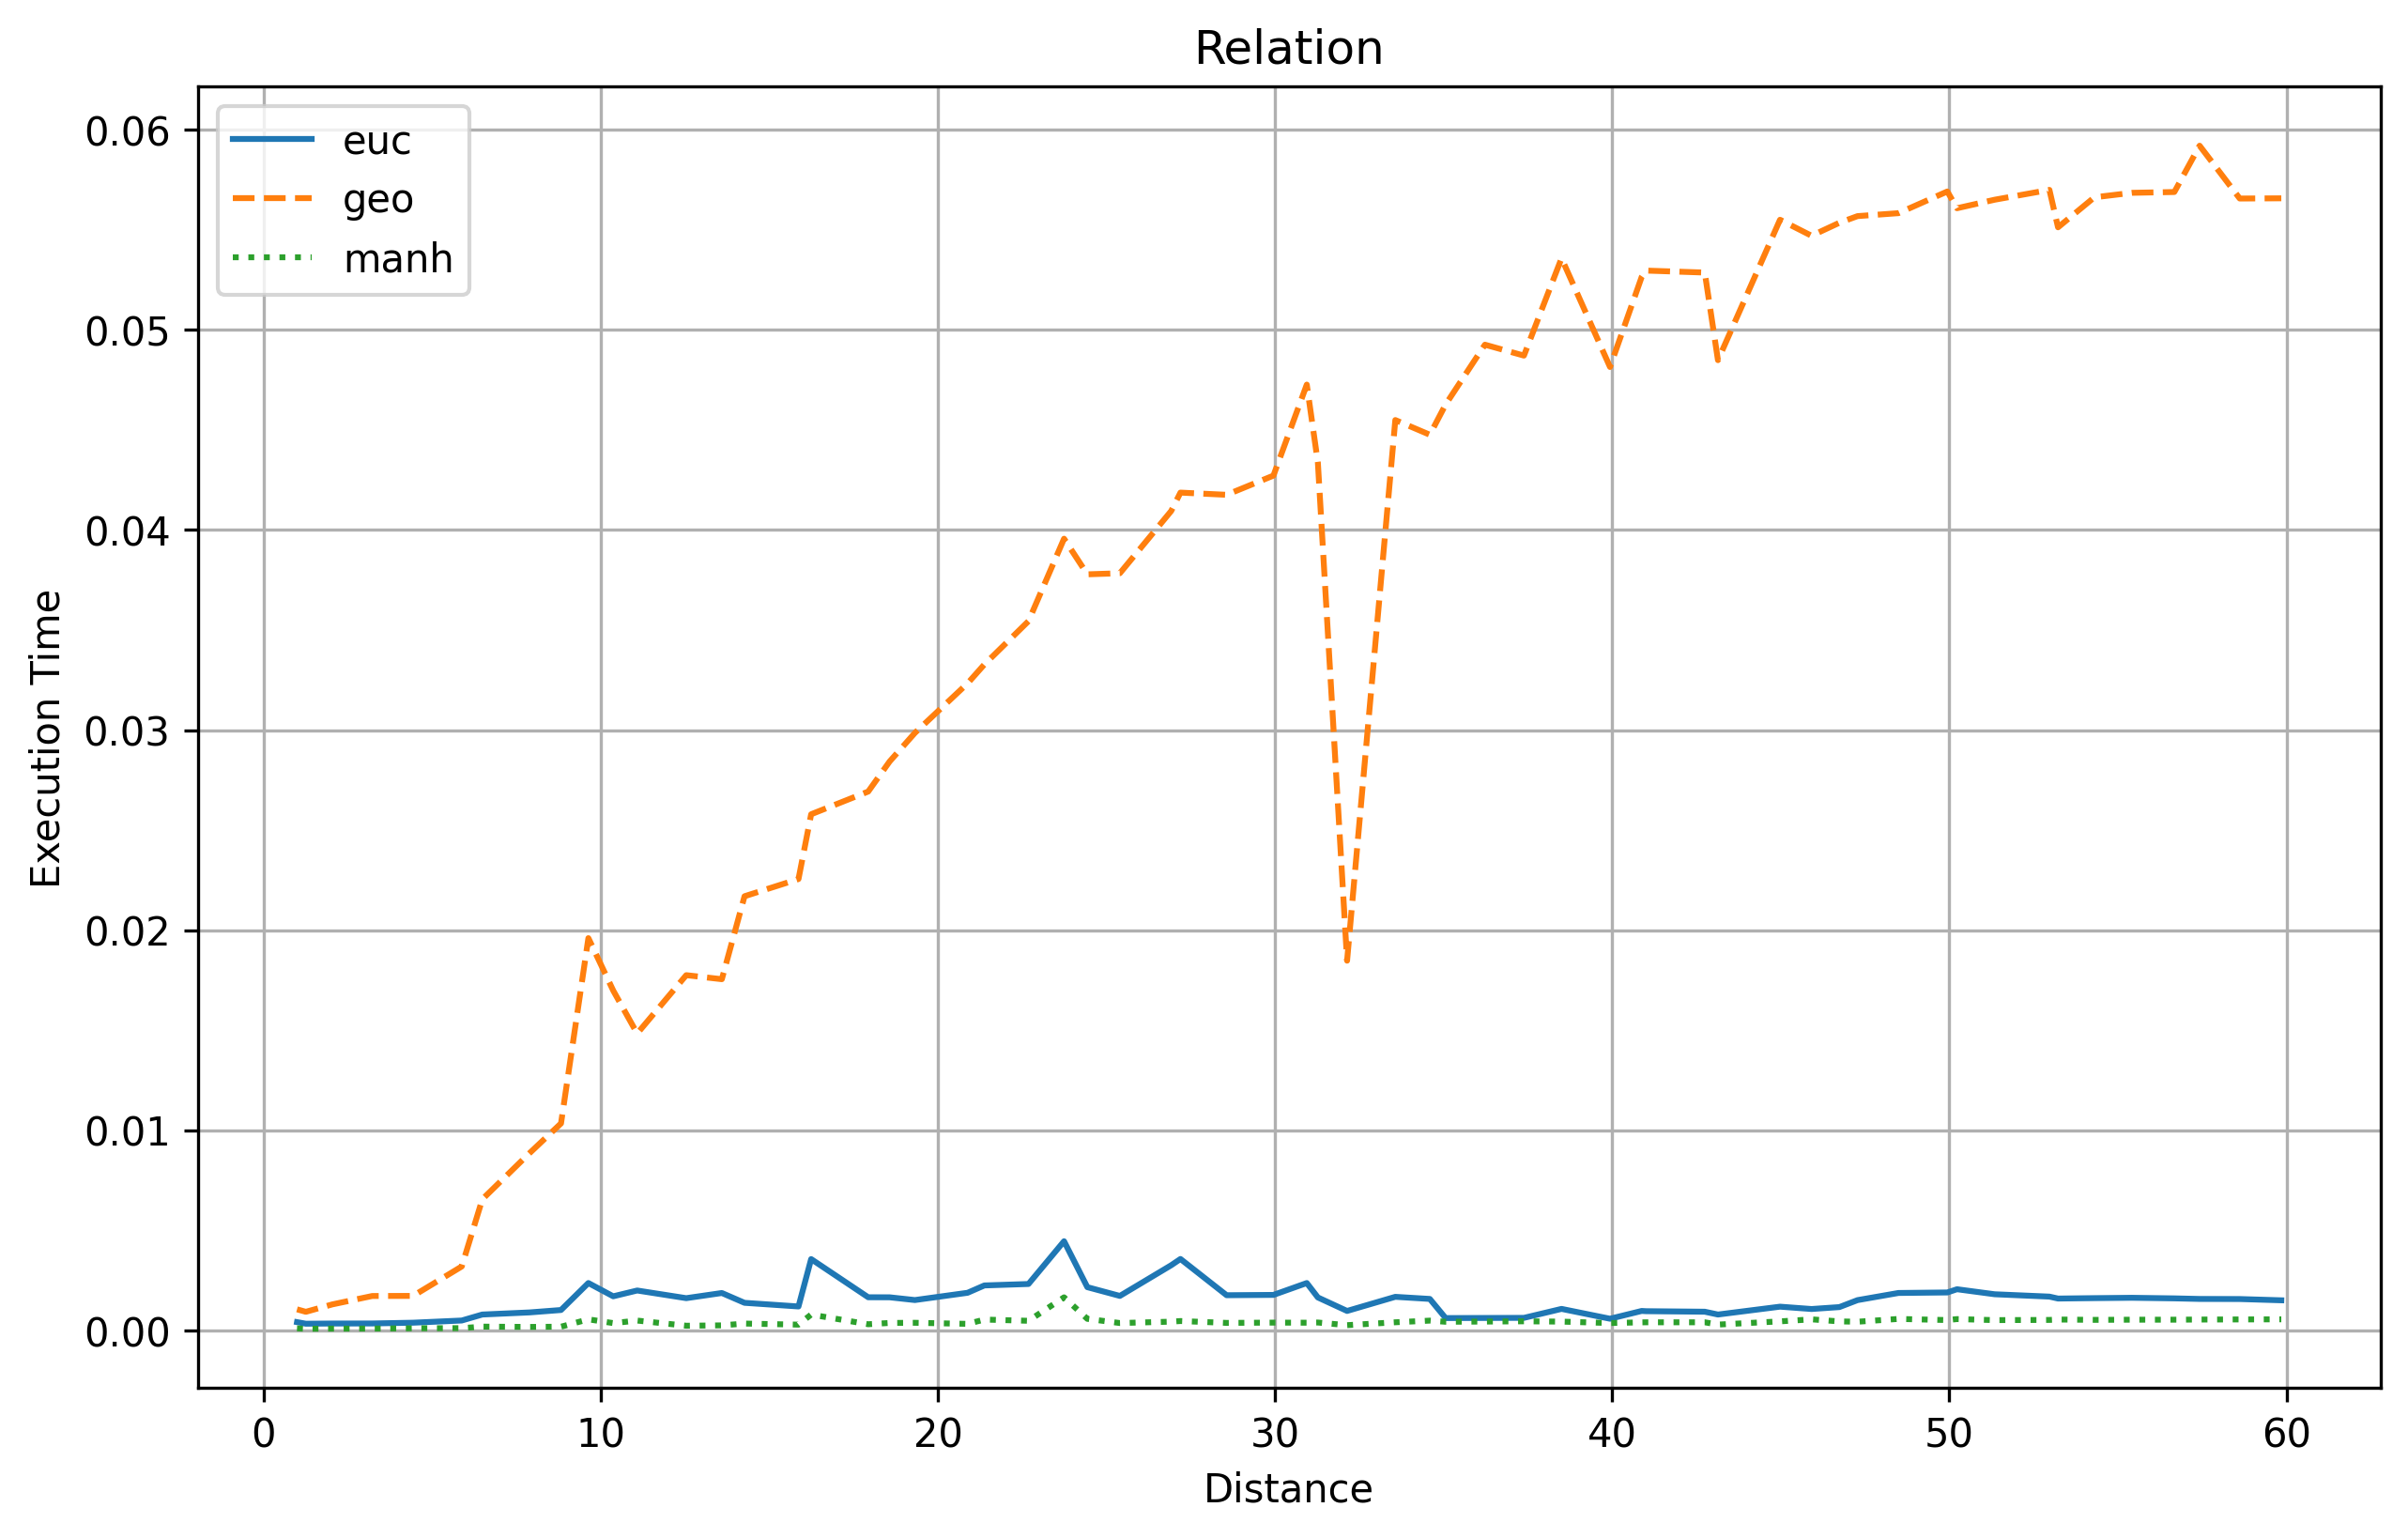

In [43]:
distances = [pair[2] for pair in selected_pairs]

plt.figure(figsize=(10, 6),dpi=300)

plt.plot(distances, euc_execution_time, label='euc')
plt.plot(distances, geo_execution_time, label='geo', linestyle='dashed')
plt.plot(distances, manh_execution_time, label='manh', linestyle='dotted')

plt.title('Relation')
plt.xlabel('Distance')
plt.ylabel('Execution Time')
plt.legend()
plt.grid(True)
plt.savefig('heuristic_time_1.png')
plt.show()